Scholia pageview statistics
===========================

This notebook will show the Toolforge pageview statistics of Scholia.
The pageviews are detemined through an API call to the "toolviews" Toolforge tool that only 
has data as far back as 30 April 2018.

In [1]:
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url_pattern = "https://tools.wmflabs.org/toolviews/api/v1/tool/scholia/daily/{}/{}"

In [3]:
now = datetime.now().isoformat()
start_date = "2018-04-30"
end_date = now[:10]

In [4]:
url = url_pattern.format(start_date, end_date)

In [5]:
response = requests.get(url)

In [6]:
response.ok

True

In [7]:
data = [(key, value['scholia']) for key, value in sorted(response.json()['results'].items())]
df = pd.DataFrame(data, columns=['date', 'page views'])
df = df.set_index('date')

In [8]:
df.sample(10)

,page views
date,
2019-10-18,13094
2018-10-11,14785
2018-09-13,6010
2019-10-11,9276
2019-08-30,6706
2018-09-24,21835
2019-06-22,7378
2018-08-12,2220
2018-10-29,8401


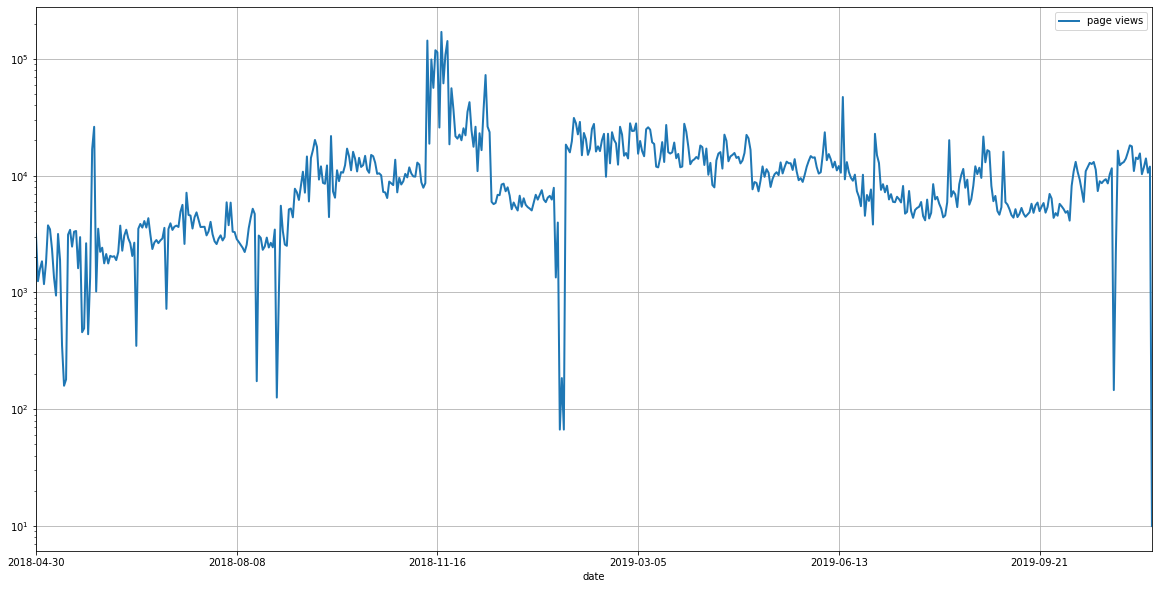

In [9]:
ax = df.plot(figsize=(20, 10), logy=True, linewidth=2)
ax.grid()
plt.show()

In [10]:
png_filename = 'scholia-pageviews-' + now[:10] + ".png"

In [11]:
ax.get_figure().savefig(png_filename)